In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import lux
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [3]:
#Read the data
data=pd.read_csv("D:\\Machine Learning\\Research Work\\IoT intrusion detection\\BOT IOT Dataset\\Training and Test Dataset\\DDOS_HTTP.csv")

In [4]:
#Making a copy of data
data=data.copy()

#Feature Engineering

1. Understanding Data

In [5]:
#checking the missing values
data.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64


In [6]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pkSeqID            402 non-null    int64  
 1   proto              402 non-null    object 
 2   saddr              402 non-null    object 
 3   sport              402 non-null    int64  
 4   daddr              402 non-null    object 
 5   dport              402 non-null    int64  
 6   seq                402 non-null    int64  
 7   stddev             402 non-null    float64
 8   N_IN_Conn_P_SrcIP  402 non-null    int64  
 9   min                402 non-null    float64
 10  state_number       402 non-null    int64  
 11  mean               402 non-null    float64
 12  N_IN_Conn_P_DstIP  402 non-null    int64  
 13  drate              402 non-null    float64
 14  srate              402 non-null    float64
 15  max                402 non-null    float64
 16  attack             402 non

In [7]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3576923,tcp,192.168.100.5,0,192.168.100.3,0,7,0.235357,7,0.598172,2,4.898582,7,0.000000,10.932437,4.999866,0,Normal,Normal
1,1650441,tcp,192.168.100.147,57126,192.168.100.3,80,189,0.516352,16,0.912216,1,1.428568,100,0.503557,0.632708,1.944920,1,DDoS,HTTP
2,3577233,udp,192.168.100.150,46295,192.168.217.2,53,17475,0.000000,11,0.000000,4,0.000000,20,0.000000,0.400001,0.000000,0,Normal,Normal
3,3576925,tcp,192.168.100.3,80,192.168.100.55,8080,1,0.228494,20,0.768694,2,4.947914,2,17.633553,17.634146,4.999863,0,Normal,Normal
4,3577135,udp,192.168.100.147,38275,192.168.217.2,53,23527,0.000000,18,0.000000,4,0.000000,18,0.000000,0.399866,0.000000,0,Normal,Normal


In [8]:
data['proto'].unique()

array(['tcp', 'udp', 'arp', 'ipv6-icmp'], dtype=object)

In [9]:
data['saddr'].unique()

array(['192.168.100.5', '192.168.100.147', '192.168.100.150',
       '192.168.100.3', '192.168.100.149', '192.168.100.27',
       '192.168.100.148', 'fe80::250:56ff:febe:254',
       'fe80::250:56ff:febe:e9d9', '192.168.100.46',
       'fe80::250:56ff:febe:26db', '192.168.100.1', '192.168.100.6',
       'fe80::250:56ff:febe:89ee', '192.168.100.4', '192.168.100.7'],
      dtype=object)

In [10]:
data['daddr'].unique()

array(['192.168.100.3', '192.168.217.2', '192.168.100.55',
       '255.255.255.255', '96.7.49.66', '205.251.197.206',
       '192.168.100.1', '205.251.194.201', '224.0.0.251',
       '205.251.196.32', '52.201.147.106', '192.5.5.241', '192.55.83.30',
       '192.31.80.30', '8.8.8.8', '13.55.154.73', 'ff02::2',
       '192.41.162.30', '129.250.35.250', 'ff02::fb', '27.124.125.250',
       '199.19.56.1', '192.168.100.5', '192.33.14.30', '205.251.199.148',
       '192.58.128.30', '192.12.94.30', '205.251.196.160',
       '205.251.199.194', '192.36.148.17', '184.85.248.65', '192.33.4.12',
       '52.11.124.117', '192.168.100.255', '192.54.112.30', 'ff02::1',
       '172.217.25.170', '205.251.194.102', '192.112.36.4',
       '192.168.100.7', '205.251.194.86', '192.168.100.27',
       '192.52.178.30', '205.251.195.59', '52.35.35.13'], dtype=object)

In [11]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
#Removing the unwanted coloumns
col=['saddr','daddr','category','subcategory']
data=data.drop(columns=col,axis=1)

In [13]:
#Removing the dublicate values
data.drop_duplicates(keep='first',inplace=True)

2. Exploratory Data Analysis

In [14]:
data.head()

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
0,3576923,tcp,0,0,7,0.235357,7,0.598172,2,4.898582,7,0.000000,10.932437,4.999866,0
1,1650441,tcp,57126,80,189,0.516352,16,0.912216,1,1.428568,100,0.503557,0.632708,1.944920,1
2,3577233,udp,46295,53,17475,0.000000,11,0.000000,4,0.000000,20,0.000000,0.400001,0.000000,0
3,3576925,tcp,80,8080,1,0.228494,20,0.768694,2,4.947914,2,17.633553,17.634146,4.999863,0
4,3577135,udp,38275,53,23527,0.000000,18,0.000000,4,0.000000,18,0.000000,0.399866,0.000000,0


In [15]:
#Frequency of each category
data['proto'].value_counts()

tcp          297
udp           92
arp           10
ipv6-icmp      3
dtype: int64


In [16]:
#relationship between the independent variables
data.corr()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
#Cross tables and data visualization
#Extracting the coloumn names
data.columns

Index(['pkSeqID', 'proto', 'sport', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack'],
      dtype='object')

In [18]:
#proto proportion table
pd.crosstab(index=data['proto'],columns='count',normalize=True)

col_0,count
proto,
arp,0.024876
ipv6-icmp,0.007463
tcp,0.738806
udp,0.228856


In [19]:
#proto vs attack
pd.crosstab(index=data['proto'],columns=data['attack'],normalize=True)

attack,0,1
proto,,
arp,0.024876,0.000000
ipv6-icmp,0.007463,0.000000
tcp,0.032338,0.706468
udp,0.228856,0.000000


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

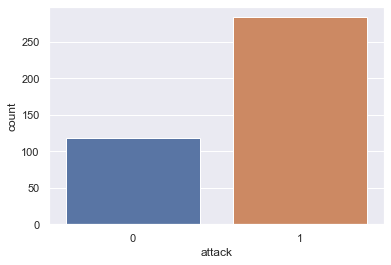

In [20]:
#frequency distribution of attack
sns.countplot(data['attack'])

In [21]:

data=data.drop(columns='pkSeqID')

In [22]:
#Categorical Encoding
data=pd.get_dummies(data)

In [23]:
data.head()

,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,proto_arp,proto_ipv6-icmp,proto_tcp,proto_udp
0,0,0,7,0.235357,7,0.598172,2,4.898582,7,0.000000,10.932437,4.999866,0,0,0,1,0
1,57126,80,189,0.516352,16,0.912216,1,1.428568,100,0.503557,0.632708,1.944920,1,0,0,1,0
2,46295,53,17475,0.000000,11,0.000000,4,0.000000,20,0.000000,0.400001,0.000000,0,0,0,0,1
3,80,8080,1,0.228494,20,0.768694,2,4.947914,2,17.633553,17.634146,4.999863,0,0,0,1,0
4,38275,53,23527,0.000000,18,0.000000,4,0.000000,18,0.000000,0.399866,0.000000,0,0,0,0,1


In [24]:
#Seperating the features and target variable
y=data['attack']
x=data.drop(columns='attack')

In [25]:
data.shape

(402, 17)

In [26]:
x.shape

(402, 16)

#

In [27]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [28]:
x.shape

(568, 16)

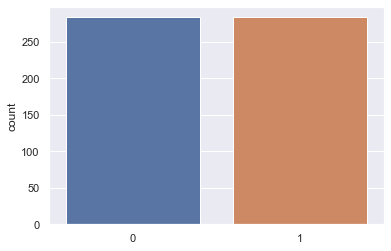

In [29]:
sns.countplot(y)

In [30]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [31]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 100.00%
Cross Validation Accuracy: 100.00% 


Text(0.5, 1.0, 'Random Forest Classifier')

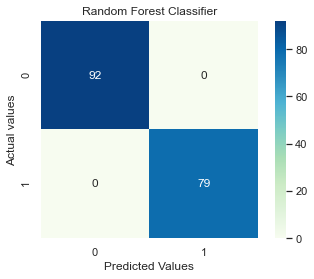

In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('Random Forest Classifier')

In [35]:
from sklearn.metrics import classification_report
print('Random Forest Classifier')
print(classification_report(y_test, y_pred))

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        79

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

1.0

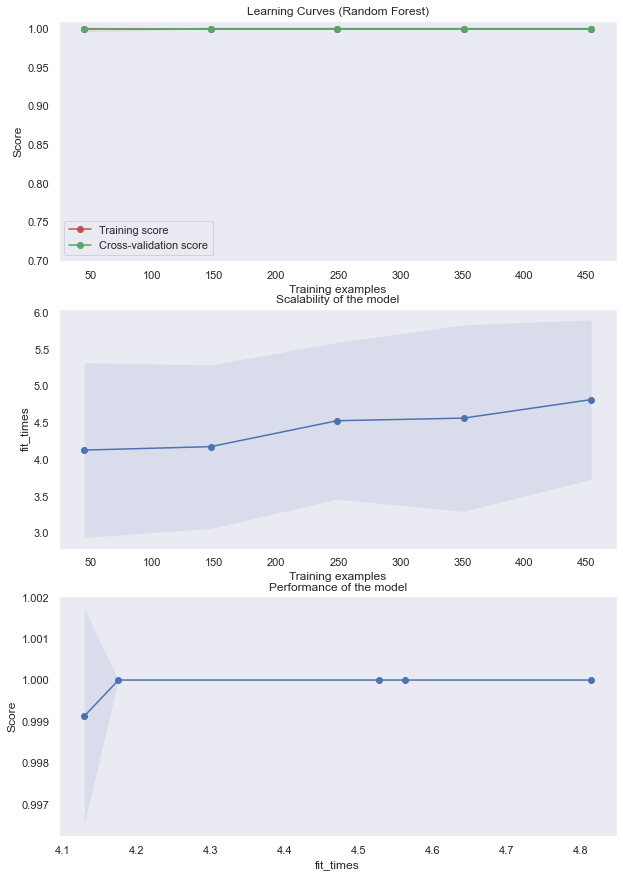

In [39]:
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, x, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Random Forest)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, x, y,axes=axes[:,], cv=cv, ylim=(0.7, 1.01), n_jobs=4)

plt.show()